In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder



In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset with specified encoding
file_path = '/content/drive/MyDrive/a_kaggle_dataset/Online_Retail_Data_Set.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.shape

(541909, 8)

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Check for null or NaN values in the DataFrame
null_values = df.isnull().any()

# Get the column names with null or NaN values
columns_with_null = df.columns[null_values]

if columns_with_null.empty:
    print("There are no null or NaN values in the DataFrame.")
else:
    print("Null or NaN values are present in the following columns:")
    print(columns_with_null)


Null or NaN values are present in the following columns:
Index(['Description', 'CustomerID'], dtype='object')


In [9]:
# Iterate through columns and check data types
non_integer_columns = []
for column in df.columns:
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
        non_integer_columns.append(column)

# Print columns with non-integer values
if non_integer_columns:
    print("Columns with non-integer values:")
    for column in non_integer_columns:
        print(column)
else:
    print("All columns have integer values.")


Columns with non-integer values:
InvoiceNo
StockCode
Description
InvoiceDate
Country


# 1.1. Handling Missing Values

In [10]:
# 1.1. Handling Missing Values

 # Remove rows with null or NaN values in the 'CustomerID' column
df.dropna(subset=['CustomerID'], inplace=True)

# Calculate mean for rest of the numeric columns
numeric_cols = df.select_dtypes(include='number')
#numeric_cols = numeric_cols.drop(columns=['CustomerID'])
df.fillna(numeric_cols.mean(), inplace=True)

#df["CustomerID"] = df["CustomerID"].astype(str)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
# Check for null or NaN values in the DataFrame
null_values = df.isnull().any()

# Get the column names with null or NaN values
columns_with_null = df.columns[null_values]

if columns_with_null.empty:
    print("There are no null or NaN values in the DataFrame.")
else:
    print("Null or NaN values are present in the following columns:")
    print(columns_with_null)


There are no null or NaN values in the DataFrame.


#1.2. Encode Categorical Variables with integer dtype

In [12]:
#1.2. Encode Categorical Variables with integer dtype

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'Country' & 'StockCode' column
df['Country_Code'] = label_encoder.fit_transform(df['Country'])
df['StockCodeInt'] = label_encoder.fit_transform(df['StockCode'])


df.head(55)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_Code,StockCodeInt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,35,3249
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,35,2649
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,35,2855
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,35,2803
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,35,2802
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom,35,1605
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom,35,755
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,35,1490
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,35,1489
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom,35,3069


In [13]:
# Selecting columns with numerical values
numeric_df = df.select_dtypes(include=np.number)

# Displaying information about the new DataFrame
print("Numerical DataFrame info:")
numeric_df.info()

Numerical DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      406829 non-null  int64  
 1   UnitPrice     406829 non-null  float64
 2   CustomerID    406829 non-null  float64
 3   Country_Code  406829 non-null  int64  
 4   StockCodeInt  406829 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 18.6 MB


In [14]:
numeric_df.head(55)

,Quantity,UnitPrice,CustomerID,Country_Code,StockCodeInt
0,6,2.55,17850.0,35,3249
1,6,3.39,17850.0,35,2649
2,8,2.75,17850.0,35,2855
3,6,3.39,17850.0,35,2803
4,6,3.39,17850.0,35,2802
5,2,7.65,17850.0,35,1605
6,6,4.25,17850.0,35,755
7,6,1.85,17850.0,35,1490
8,6,1.85,17850.0,35,1489
9,32,1.69,13047.0,35,3069


In [16]:
# Iterate through columns and check data types
non_integer_columns = []
for column in df.columns:
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
        non_integer_columns.append(column)

# Print columns with non-integer values
if non_integer_columns:
    print("Columns with non-integer values:")
    for column in non_integer_columns:
        print(column)
else:
    print("All columns have integer values.")


Columns with non-integer values:
InvoiceNo
StockCode
Description
InvoiceDate
Country


In [32]:
numeric_df.columns

Index(['Quantity', 'UnitPrice', 'CustomerID', 'Country_Code', 'StockCodeInt'], dtype='object')

# 1.3. Feature Scaling

In [19]:
# 1.3. Feature Scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)


In [20]:
# Check for null or NaN values in scaled_features
null_indices = np.isnan(scaled_features)

# Get the column names with null or NaN values
columns_with_null = numeric_df.columns[np.any(null_indices, axis=0)]

if columns_with_null.empty:
    print("There are no null or NaN values in scaled features.")
else:
    print("Null or NaN values are present in the following columns:")
    print(columns_with_null)

There are no null or NaN values in scaled features.


In [21]:
print(scaled_features[:5])


[[-2.43726274e-02 -1.31352523e-02  1.49528019e+00  3.22364144e-01
   1.98535093e+00]
 [-2.43726274e-02 -1.01667663e-03  1.49528019e+00  3.22364144e-01
   1.27449556e+00]
 [-1.63305857e-02 -1.02498771e-02  1.49528019e+00  3.22364144e-01
   1.51855591e+00]
 [-2.43726274e-02 -1.01667663e-03  1.49528019e+00  3.22364144e-01
   1.45694844e+00]
 [-2.43726274e-02 -1.01667663e-03  1.49528019e+00  3.22364144e-01
   1.45576368e+00]]


In [22]:
# Convert scaled features array to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)

scaled_features_df.head()


,Quantity,UnitPrice,CustomerID,Country_Code,StockCodeInt
0,-0.024373,-0.013135,1.49528,0.322364,1.985351
1,-0.024373,-0.001017,1.49528,0.322364,1.274496
2,-0.016331,-0.010250,1.49528,0.322364,1.518556
3,-0.024373,-0.001017,1.49528,0.322364,1.456948
4,-0.024373,-0.001017,1.49528,0.322364,1.455764


# 1.4. Dimensionality Reduction (PCA)

In [23]:
# 1.4. Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features_df)

# 1.5. Dimensionality Reduction (t-SNE)

In [ ]:
# 1.5. Dimensionality Reduction (t-SNE) # takes too long
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(scaled_features_df)

# 2. Exploratory Data Analysis(EDA)

In [25]:
#EDA
# Summary Statistics
summary_stats = numeric_df.describe()
summary_stats

,Quantity,UnitPrice,CustomerID,Country_Code,StockCodeInt
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,32.827731,1573.257501
std,248.693370,69.315162,1713.600303,6.738565,844.054584
min,-80995.000000,0.000000,12346.000000,0.000000,0.000000
25%,2.000000,1.250000,13953.000000,35.000000,937.000000
50%,5.000000,1.950000,15152.000000,35.000000,1522.000000
75%,12.000000,3.750000,16791.000000,35.000000,2106.000000
max,80995.000000,38970.000000,18287.000000,36.000000,3683.000000


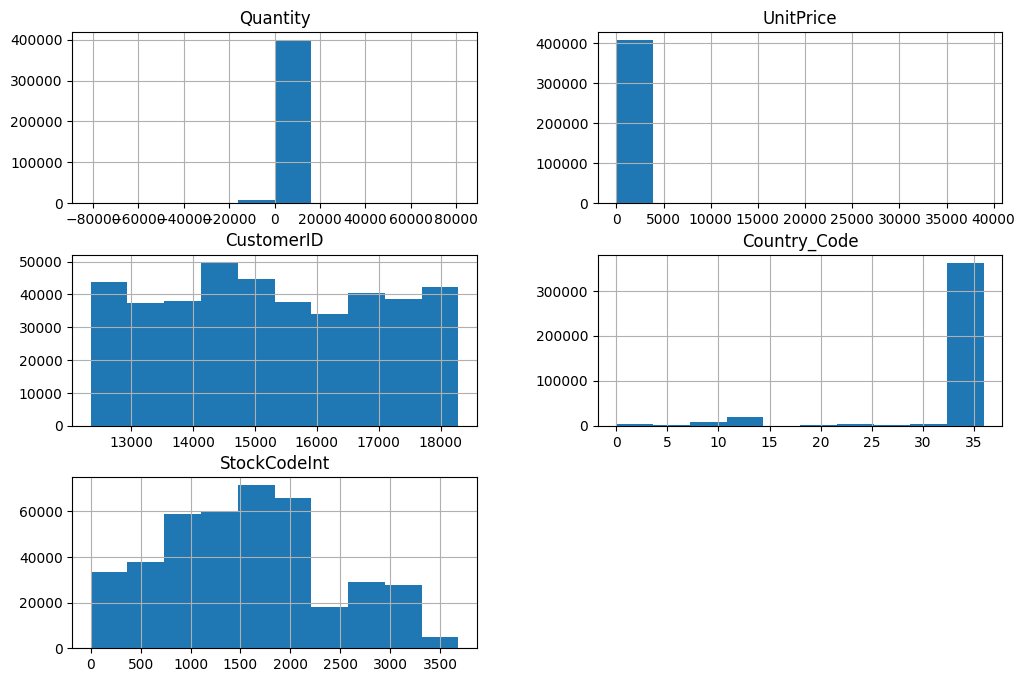

In [26]:
# Univariate Analysis
numeric_df.hist(figsize=(12, 8))
plt.show()

#sns.countplot(x='CustomerID', data=df)
#plt.show()

In [33]:
#sns.countplot(x='CustomerID', data=numeric_df)
#plt.show()

KeyboardInterrupt: 

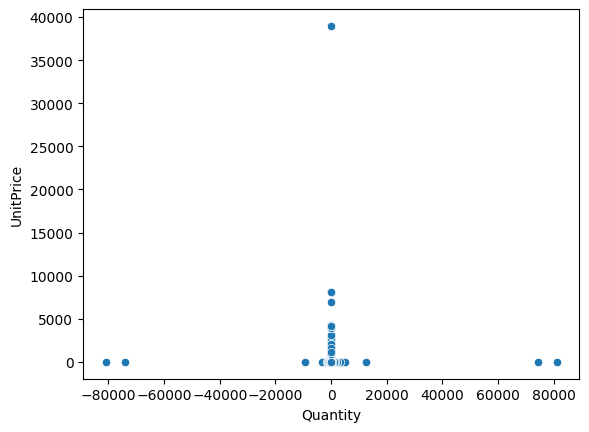

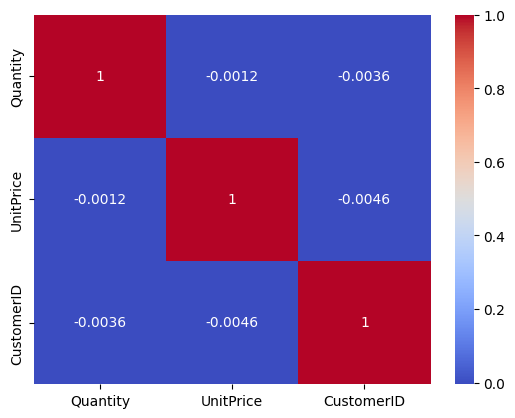

In [27]:
# Bivariate Analysis
sns.scatterplot(x='Quantity', y='UnitPrice', data=numeric_df)
plt.show()


sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:

# Define a subset of numeric columns to visualize
numeric_cols_subset = ['Quantity', 'UnitPrice']

# Define a function to create histograms for numeric columns
def create_histogram(column):
    sns.histplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Parallelize the visualization process
joblib.Parallel(n_jobs=-1)(
    joblib.delayed(create_histogram)(column) for column in numeric_cols_subset
)


KeyboardInterrupt: 

In [ ]:
# Categorical Variable Analysis
categorical_cols = df.select_dtypes(include='object')
# Define a function to create count plots for categorical columns
def create_countplot(column):
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    plt.show()


# Parallelize the visualization process
joblib.Parallel(n_jobs=-1)(
    joblib.delayed(create_countplot)(column) for column in categorical_cols.columns
)

In [29]:
# Temporal Analysis
# Example: Convert 'InvoiceDate' to datetime and extract date components
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day


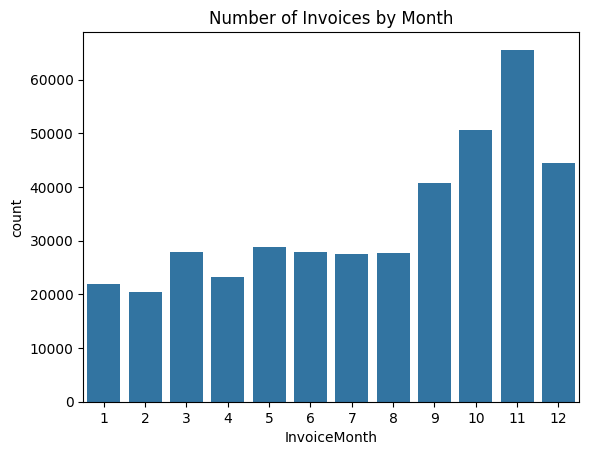

In [30]:
# Visualize trends by month
sns.countplot(x='InvoiceMonth', data=df)
plt.title('Number of Invoices by Month')
plt.show()


In [ ]:
# Multivariate Analysis
#sns.pairplot(df[numeric_cols.columns])
#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


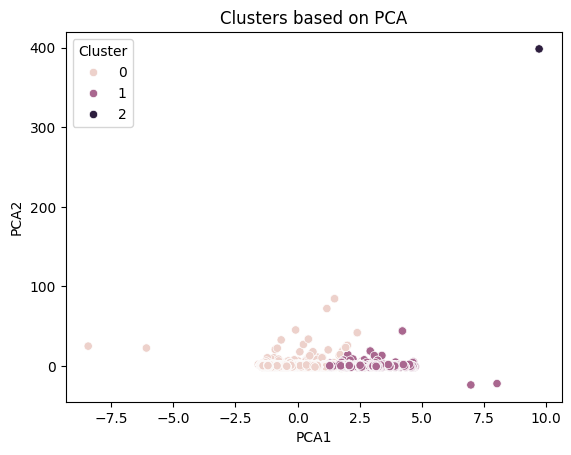

In [31]:
# Cluster Analysis
# K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features_df)
df['Cluster'] = kmeans.labels_

# After performing PCA, add the principal components to the DataFrame
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Now plot the scatterplot
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title('Clusters based on PCA')
plt.show()

# 3.  Predicting Customer purchase behaviour with Random Forest built from Scratch

In [34]:
# Import necessary libraries
import numpy as np

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / self.n_estimators


class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if len(y) <= self.min_samples_split or (self.max_depth is not None and depth == self.max_depth):
            return np.mean(y)

        feature_index, threshold = self.find_best_split(X, y)

        if feature_index is None:
            return np.mean(y)

        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices

        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': feature_index, 'threshold': threshold,
                'left_subtree': left_subtree, 'right_subtree': right_subtree}

    def find_best_split(self, X, y):
        best_feature_index = None
        best_threshold = None
        best_loss = float('inf')

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) < self.min_samples_split or len(y[right_indices]) < self.min_samples_split:
                    continue

                loss = self.calculate_loss(y[left_indices], y[right_indices])

                if loss < best_loss:
                    best_loss = loss
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def calculate_loss(self, left_y, right_y):
        left_weight = len(left_y) / (len(left_y) + len(right_y))
        right_weight = len(right_y) / (len(left_y) + len(right_y))

        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)

        return left_weight * left_mse + right_weight * right_mse

    def predict(self, X):
        return np.array([self.predict_single(x, self.tree) for x in X])

    def predict_single(self, x, tree):
        if isinstance(tree, (int, float)):
            return tree

        if x[tree['feature_index']] < tree['threshold']:
            return self.predict_single(x, tree['left_subtree'])
        else:
            return self.predict_single(x, tree['right_subtree'])



# 4. Splitting the Dataset, training the model & evaluating it

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df[['UnitPrice', 'CustomerID', 'Country_Code', 'StockCodeInt']].values
y = df['Quantity'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and fit the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_regressor.predict(X_test)



KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, median_absolute_error, r2_score

# Make predictions on the testing set
predictions = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Evaluate the model using R-squared (R2)
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error:", mape)

# Evaluate the model using Median Absolute Error
medae = median_absolute_error(y_test, predictions)
print("Median Absolute Error:", medae)


# 5. Visualizing the overall performance of our model with plots

In [ ]:


# Define the performance metrics and their values
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE', 'Median AE']
values = [mae, mse, rmse, r2, mape, medae]

# Create a bar plot for performance metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.title('Performance Metrics of Random Forest Regression Model')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values of Quantity')
plt.show()